# CADi: Data Wrangling in Python
# Example: NFL
Objective:
To learn the basics of data imporing, filtering and ploting in pandas, matplotlib and seaborn.

## Import the required libraries

In [3]:
import seaborn as sns
from matplotlib import cm
import numpy as np
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

## Load the dataset

In [4]:
## Para verificar la ruta:
import os
os.getcwd()

'C:\\Users\\L00871590\\Desktop\\GitHub\\dataPy\\scripts'

In [7]:
data = pd.read_csv("C:\\Users\\L00871590\\Desktop\\GitHub\\dataPy\\data\\extracted\\NFL\\NFL.csv")
data.head()
list(data.columns)

['Age',
 'Birth Place',
 'Birthday',
 'College',
 'Current Status',
 'Current Team',
 'Experience',
 'Height (inches)',
 'High School',
 'High School Location',
 'Name',
 'Number',
 'Player Id',
 'Position',
 'Weight (lbs)',
 'Years Played']

## Filtering and selecting: first step

In [12]:
## Creamos una variable con jugadores mayores que 30 años de la columna "Age".
ageFiltervalue=30
ageFilter=data["Age"]>ageFiltervalue
aboveAge=data[ageFilter]
## Nos devuelve la longitud de la variable
len(aboveAge)
## Nos muestra las primeras filas de la variable "aboveAge"
aboveAge.head()

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,High School Location,Name,Number,Player Id,Position,Weight (lbs),Years Played
2,56.0,"Temple , TX",9/11/1960,Louisiana Tech,Retired,NaN,1 Season,74.0,NaN,NaN,"Fowler, Bobby",NaN,bobbyfowler/2514295,NaN,230.0,1985 - 1985
9,98.0,"Alverton , PA",2/23/1919,Duquesne,Retired,NaN,1 Season,70.0,NaN,NaN,"Gonda, George",NaN,georgegonda/2515030,NaN,175.0,1942 - 1942
11,56.0,"Alton , IL",2/10/1961,Southern University,Retired,NaN,1 Season,69.0,NaN,NaN,"Raglin, Floyd",NaN,floydraglin/2523695,NaN,180.0,1987 - 1987
12,33.0,NaN,12/4/1983,Boise State,Retired,NaN,1 Season,74.0,NaN,NaN,"Zabransky, Jared",NaN,jaredzabransky/2495791,NaN,219.0,2007 - 2007
14,73.0,"St. Louis , MO",12/8/1943,Missouri,Retired,NaN,8 Seasons,73.0,NaN,NaN,"Otto, Gus",NaN,gusotto/2522592,NaN,220.0,1965 - 1972


## Filtering and selecting: second step

In [9]:
## Con esta instrucción mandamos llamar el contenido de la columna "Current Status", y al teclear [].unique() nos indica los elementos categóricos de la columna.
## Si quitas la instrucción ".unique()", verás lo que pasa.
data["Current Status"].unique()

array(['Retired', 'Active', 'Unsigned free agent', 'Suspended',
       'Injured reserve', 'Physically unable to perform'], dtype=object)

In [10]:
## Estamos creando una variable de aquellos jugadores que se mantienen activos, que se obtiene de la columna "Current Status"
activeFilter=data["Current Status"]=="Active"
## Creamos otra variable con los jugadores activos y mayores que 30 años
aboveAndActive=data[ageFilter & activeFilter]
## Pedimos la longitud del objeto:
len(aboveAndActive)

183

## Plotting

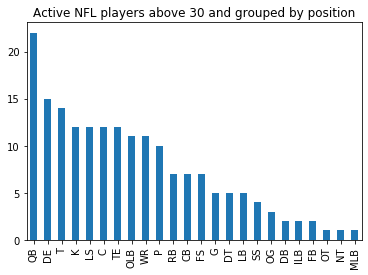

In [15]:
## Definimos el objeto que contiene la información de "aboveAndActive" bajo el atributo "Position"
## y que cuente las observaciones con la instrucción ".value_counts()":
frequencies = aboveAndActive["Position"].value_counts()
## Asignamos la instrucción de "plot" al objeto "frequencies" y establecemos sus características de graficado:
frequencies.plot(
    kind="bar",
    title=(
        "Active NFL players above " +
        str(ageFiltervalue) +
        " and grouped by position"
    ),
)

## Plotting with style

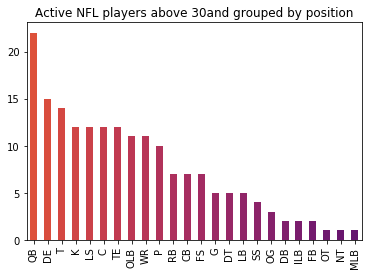

In [18]:
## Asignamos tipo de color:
color=cm.inferno_r(np.linspace(.4,.8,30))
## Asignamos la instrucción de graficado al objeto "frequencies":
frequencies.plot(
    kind="bar",
    title=(
        "Active NFL players above " +
        str(ageFiltervalue) +
        "and grouped by position"
    ),
    color=color
)

## Scatterplot

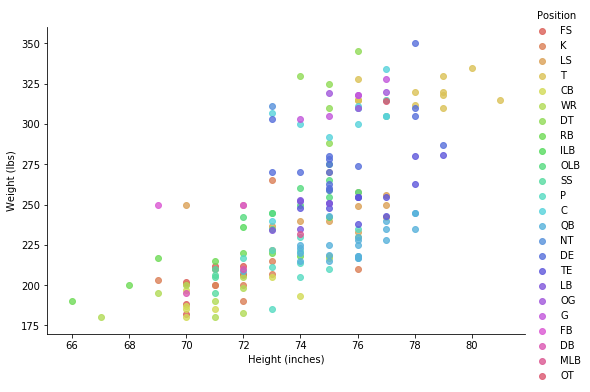

In [20]:
## Esta instrucción es similar a ggplot en R; en Python utilizamos "lmplot" de la librería "seaborn";
## Recordemos que los datos están contenidos en el objeto "aboveAndActive";
## En el atributo del gráfico "len()" al escribir [].unique se especifica la longitud por elemento categórico de la variable "Position" del objeto "aboveAndActive":
sns.lmplot(
    x="Height (inches)", y="Weight (lbs)", data=aboveAndActive,
    aspect=1.5, fit_reg=False, hue='Position', legend=True,
    palette=sns.color_palette("hls", len(aboveAndActive["Position"].unique()))
)